In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

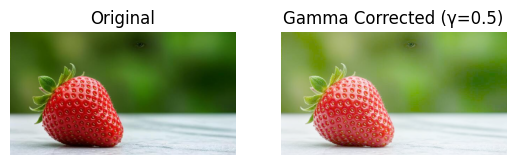

In [ ]:
def gamma_correction(I_image, c, gamma):
    
    # Normilize
    I_norm = I_image.astype('float32') / 255

    # Apply gamma
    I_gamma = c * (I_norm ** gamma)

    # 'Un'normilize, back to the 0-255
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')

# * 255	Rescaling	Translates "0 to 1" range back to "0 to 255".
# np.clip	Limiting	Prevents values from "breaking" the 0–255 boundary.
# uint8	Casting	Changes the data type to a standard image format.
    
    return I_out

img = cv2.imread('1.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gamma_res = gamma_correction(img_rgb, 1.0, 0.5)

# Original
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

# After gamma corection
plt.subplot(1, 2, 2)
plt.imshow(gamma_res)
plt.title('Gamma Corrected (γ=0.5)')
plt.axis('off')

plt.show()

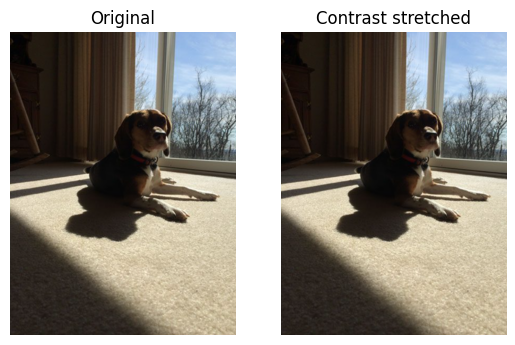

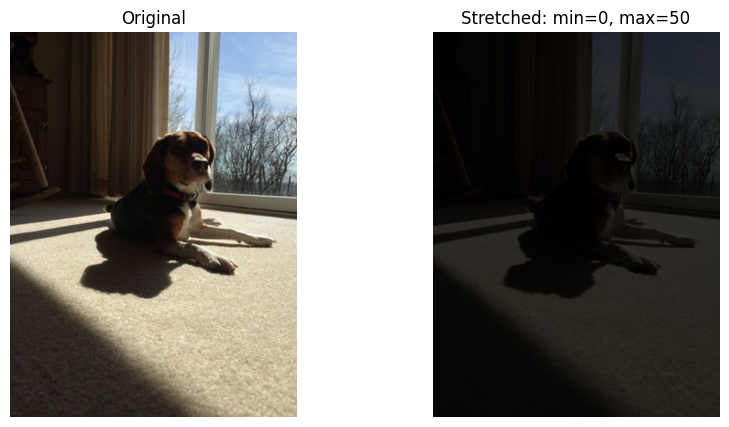

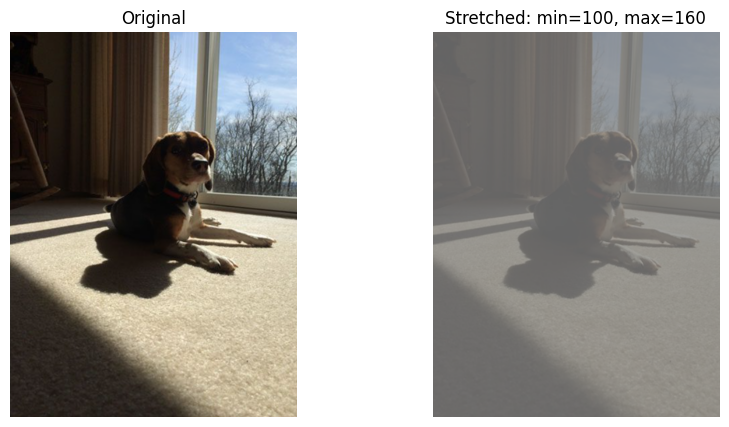

In [13]:
def contrast_stretching(i_in, s_min=0, s_max=255):

    r_min = np.min(i_in)
    r_max = np.max(i_in)

    if r_max == r_min:
        return np.zeros_like(i_in, dtype='uint8')

    i_out = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min
    i_out = np.clip(i_out, s_min, s_max).astype('uint8')

    return i_out

img = cv2.cvtColor(cv2.imread('2.png'), cv2.COLOR_BGR2RGB)

img_contrast_stretched = contrast_stretching(img_rgb)

# Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# After gamma corection
plt.subplot(1, 2, 2)
plt.imshow(img_contrast_stretched)
plt.title('Contrast stretched')
plt.axis('off')

combinations = [(0, 50), (100, 160)]

for s_min, s_max in combinations:
    img_res = contrast_stretching(img, s_min=s_min, s_max=s_max)
    
    plt.figure(figsize=(10, 5)) 
    
    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    #
    plt.subplot(1, 2, 2) 
    plt.imshow(img_res)
    plt.title(f"Stretched: min={s_min}, max={s_max}") 
    plt.axis('off')

    plt.show()